In [1]:
import numpy as np
import datetime
import os
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

df_raw = pd.read_csv(r'data\raw_data.txt')
companies = df_raw.codigo.unique()

In [2]:
# Abre cada arquivo que foi gerado, obtém os dados de fechamento de cada empresa e salva em um df único

main_df = pd.DataFrame()
    
for companie in companies:
    df = pd.read_csv(r'data\companies\{}_1d.csv'.format(companie), index_col='datetime')
    df.rename(columns = {'close': companie}, inplace=True)
    df.drop(['open', 'high', 'low', 'volume'], axis = 1, inplace=True)
    
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')
    
    print('Juntando dados da empresa {}...'.format(companie))
    
main_df.head()

Juntando dados da empresa ABEV3...
Juntando dados da empresa B3SA3...
Juntando dados da empresa BBAS3...
Juntando dados da empresa BBDC3...
Juntando dados da empresa BBDC4...
Juntando dados da empresa BBSE3...
Juntando dados da empresa BRAP4...
Juntando dados da empresa BRFS3...
Juntando dados da empresa BRKM5...
Juntando dados da empresa BRML3...
Juntando dados da empresa BTOW3...
Juntando dados da empresa CCRO3...
Juntando dados da empresa CIEL3...
Juntando dados da empresa CMIG4...
Juntando dados da empresa CPFE3...
Juntando dados da empresa CPLE6...
Juntando dados da empresa CSAN3...
Juntando dados da empresa CSNA3...
Juntando dados da empresa CVCB3...
Juntando dados da empresa CYRE3...
Juntando dados da empresa ECOR3...
Juntando dados da empresa EGIE3...
Juntando dados da empresa ELET3...
Juntando dados da empresa ELET6...
Juntando dados da empresa EMBR3...
Juntando dados da empresa ENBR3...
Juntando dados da empresa EQTL3...
Juntando dados da empresa ESTC3...
Juntando dados da em

,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BRAP4,BRFS3,BRKM5,BRML3,...,SMLS3,SUZB3,TAEE11,TIMP3,UGPA3,USIM5,VALE3,VIVT4,VVAR11,WEGE3
datetime,,,,,,,,,,,,,,,,,,,,,
2008-01-02,3.59,NaN,17.00,1.18,12.01,NaN,31.46,19.06,9.73,7.18,...,NaN,18.41,3.14,7.17,11.68,24.04,38.75,24.22,NaN,6.44
2008-01-03,3.67,NaN,16.66,1.15,11.60,NaN,30.88,19.23,9.54,6.96,...,NaN,18.51,3.39,7.18,12.18,24.23,39.14,23.97,NaN,6.44
2008-01-04,3.57,NaN,16.49,1.18,11.51,NaN,29.82,18.85,9.26,6.65,...,NaN,17.64,3.40,7.12,11.99,23.68,37.55,23.03,NaN,6.32
2008-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Análise exploratória e seleção de correlações

Para a avaliação das correlações, será considerado a variação percentual no preço de cada ativo nos últimos 7 dias. Ou seja, estaremos avaliando a correlação entre a variação no preço dos ativos, considerando os últimos sete dias. O intervalo de tempo foi escolhido com a premissa de que as movimentações de preços dos ativos correlacionados acontecem em um prazo de até uma semana

In [3]:
# Faz um dataframe com a correlações

df_corr = main_df.pct_change(periods=7) # Diferença percentual semanal dos preços
df_corr = df_corr.corr()
print(df_corr)

correlations = df_corr.values

           ABEV3     B3SA3     BBAS3     BBDC3     BBDC4     BBSE3     BRAP4  \
ABEV3   1.000000  0.370722  0.362898  0.001385  0.427653  0.370958  0.300463   
B3SA3   0.370722  1.000000  0.609081  0.638606  0.666370  0.543065  0.402244   
BBAS3   0.362898  0.609081  1.000000  0.075275  0.771525  0.643380  0.456298   
BBDC3   0.001385  0.638606  0.075275  1.000000  0.128147  0.629003  0.047903   
BBDC4   0.427653  0.666370  0.771525  0.128147  1.000000  0.629550  0.526791   
BBSE3   0.370958  0.543065  0.643380  0.629003  0.629550  1.000000  0.269656   
BRAP4   0.300463  0.402244  0.456298  0.047903  0.526791  0.269656  1.000000   
BRFS3   0.381378  0.279507  0.363685  0.033810  0.409203  0.235450  0.282643   
BRKM5   0.256806  0.269384  0.315144  0.002914  0.374131  0.197440  0.345262   
BRML3   0.360791  0.547322  0.550796  0.086267  0.574992  0.582131  0.331489   
BTOW3   0.255155  0.289642  0.357421  0.031381  0.374712  0.238134  0.291046   
CCRO3   0.378378  0.450887  0.486944  0.

In [4]:
# Plota um heatmap com as correlações

fig = go.Figure()

fig.add_trace(go.Heatmap(x = df_corr.index, y = df_corr.index, z = df_corr.values, colorscale = 'Blues'))
fig.update_layout(title='<b> Correlações entre as empresas </b>')

fig.show()

In [5]:
# Conta quantas correlações maiores que 0.9 ou -0.9 existem para cada ativo
# É utilizado na escolha do ativo alvo

pd.options.display.max_rows = 999
df_boolean = ((df_corr > 0.7) | (df_corr < - 0.1))

companies = []
number_of_corr = []

for companie in df_corr.columns:
    sum_corr = np.sum(df_boolean[companie])
    companies.append(companie)
    number_of_corr.append(sum_corr)
    
df_sum_corr = pd.DataFrame(list(zip(companies, number_of_corr)), columns=['Companie', 'Number_of_correlations'])
df_sum_corr

,Companie,Number_of_correlations
0,ABEV3,1
1,B3SA3,1
2,BBAS3,4
3,BBDC3,1
4,BBDC4,4
5,BBSE3,3
6,BRAP4,3
7,BRFS3,1
8,BRKM5,1
9,BRML3,1


É possível perceber que alguns ativos possuem dois ou mais outros ativos fortemente correlacionados. Estes serão os ativo-alvo, ou seja, aqueles em que tentaremos prever o preço utilizando também os dados histórico de preços das ações correlacionadas.

Foi observado que o ativo CSNA3 possui fortes correlações com mais outras 4 ações. Ele será utilizado como ativo-alvo para construção do modelo.

In [6]:
# Mostra quais são os ativos correlacionados e o valor de correlação

df_csn = df_corr['CSNA3'][(df_corr['CSNA3'] > 0.7) | (df_corr['CSNA3'] < - 0.1)]
df_csn

BRAP4    0.707901
CSNA3    1.000000
GGBR4    0.719842
USIM5    0.716846
VALE3    0.714648
Name: CSNA3, dtype: float64

In [7]:
# Pego o histórico de preços só das ações que selecionei pela correlação

df_csn_corr = main_df[['BRAP4', 'GGBR4', 'USIM5', 'VALE3', 'CSNA3']]
df_csn_corr = df_csn_corr.dropna()

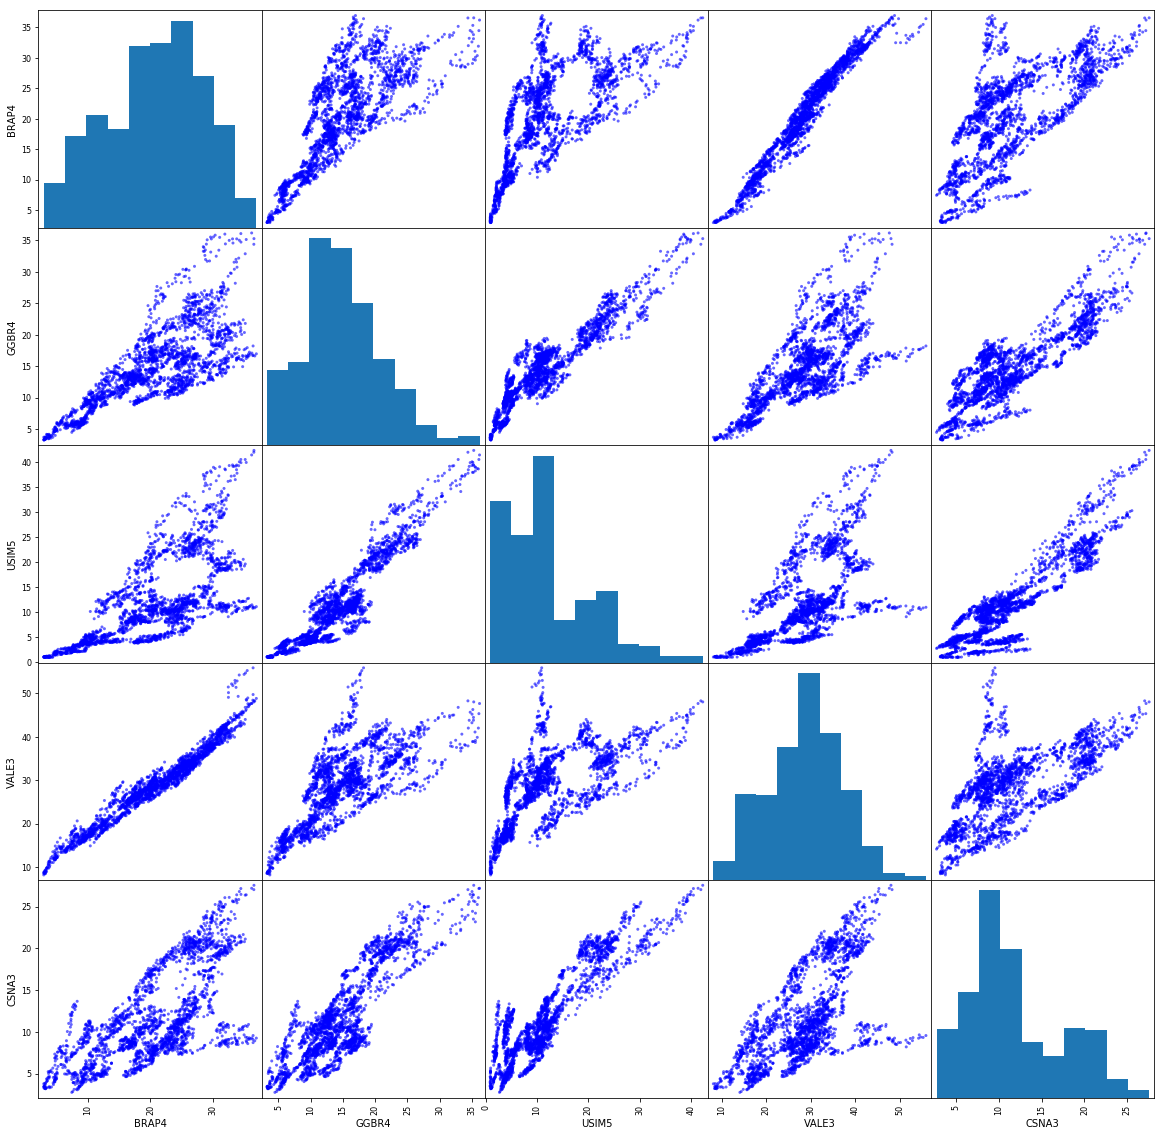

In [8]:
# Ploto um scatter matrix pra visualização
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

scatter_matrix(df_csn_corr, figsize=(20,20), alpha=0.6, color='blue')
plt.show()

In [9]:
date = pd.to_datetime(df_csn_corr.index, format = '%Y-%m-%d') # Só transforma pra datetime para conseguir plotar

In [10]:
# Plot do histórico de preços de CSNA3 e BRAP4

fig = go.Figure()
fig.add_trace(go.Scatter(x = date, y = df_csn_corr['BRAP4'], name = 'BRAP4', 
                         text = ['Valor do papel: R${}'.format(x) for x in df_csn_corr['BRAP4']], hoverinfo='x+text'))
fig.add_trace(go.Scatter(x = date, y = df_csn_corr['CSNA3'], name = 'CSNA3',
                        text = ['Valor do papel: R${}'.format(x) for x in df_csn_corr['CSNA3']], hoverinfo='x+text'))

fig.update_layout(title='<b> Histórico de preços (CSNA3 e BRAP4) </b>')
fig.update_yaxes(title_text='Valor do papel')

fig.show()

In [12]:
# Plot do histórico de preços de CSNA3 e USIM5

fig = go.Figure()
fig.add_trace(go.Scatter(x = date, y = df_csn_corr['CSNA3'], name = 'CSNA3', 
                         text = ['Valor do papel: R${}'.format(x) for x in df_csn_corr['CSNA3']], hoverinfo='x+text'))
fig.add_trace(go.Scatter(x = date, y = df_csn_corr['USIM5'], name = 'USIM5',
                        text = ['Valor do papel: R${}'.format(x) for x in df_csn_corr['USIM5']], hoverinfo='x+text'))

fig.update_layout(title = '<b> Histórico de preços (CSNA3 e USIM5) </b>')
fig.update_yaxes(title_text = 'Valor do papel')

fig.show()

Ativo alvo: CSNA3

Ativos auxiliares foretemente correlacionados: BRAP4, GGBR4, USIM5,	VALE3

## Cálculo dos indicadores para o ativo-alvo

In [13]:
df_csna3 = pd.read_csv(r'data\companies\CSNA3_1d.csv', index_col='datetime')
df_csna3.dropna(inplace=True)

In [14]:
df_csna3.index = pd.to_datetime(df_csna3.index)
df_csna3.index.names = ['date']

### Biblioteca utilizada para calcular os indicadores: finta

#### Indicadores escolhidos

MACD: Moving Average Convergence Divergence <br/>
BBANDS: Bollinger Bands <br/>
ICHIMOKU: Ichimoku Cloud <br/>
RSI: Relative Strenght Index <br/>
SAR: Stop-and-Reverse <br/>
STOCH: Stochastic Oscillator <br/>
ADX: Average Directional Index

In [15]:
from finta import TA

# MACD
# period_fast = 12; period_slow = 26; signal = 7
macd = TA.MACD(df_csna3, period_fast = 12, period_slow = 26, signal = 7)

# BBANDS
# Period: 30 days
bbands = TA.BBANDS(df_csna3, 30)

# ICHIMOKU
ichimoku = TA.ICHIMOKU(df_csna3)

# RSI
# Period: 15 days
rsi = TA.RSI(df_csna3, 15)

# SAR
sar = TA.SAR(df_csna3)

# STOCH
# Period: 15 days
stoch = TA.STOCH(df_csna3, 15)

# ADX
# Period: 15 days
adx = TA.ADX(df_csna3, 15)

In [16]:
df_csna3 = df_csna3[['close', 'volume']]

In [17]:
# Joining the series=type indicators
import warnings
warnings.filterwarnings("ignore")

df_csna3['RSI'] = rsi
df_csna3['SAR'] = sar
df_csna3['STOCH'] = stoch
df_csna3['ADX'] = adx

In [18]:
from functools import reduce

dfs = [df_csna3, macd, bbands, ichimoku]

df_all_indicators = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True), dfs)

In [19]:
# Appending the close price of the correlated stocks

df_all_indicators['close_USIM5'] = df_csn_corr['USIM5']
df_all_indicators['close_BRAP4'] = df_csn_corr['BRAP4']
df_all_indicators['close_GGBR4'] = df_csn_corr['GGBR4']
df_all_indicators['close_VALE3'] = df_csn_corr['VALE3']

In [20]:
# Appending price percent change relative to next day

df_all_indicators['close_future'] = df_all_indicators['close'].shift(periods=-1)
df_all_indicators['daily_percentage_change'] = (df_all_indicators['close_future'] - df_all_indicators['close']) / df_all_indicators['close']

In [21]:
df_all_indicators

,close,volume,RSI,SAR,STOCH,ADX,MACD,SIGNAL,BB_UPPER,BB_MIDDLE,...,KIJUN,senkou_span_a,SENKOU,CHIKOU,close_USIM5,close_BRAP4,close_GGBR4,close_VALE3,close_future,daily_percentage_change
date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,16.92,8.380289e+07,NaN,16.472079,NaN,NaN,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,24.04,31.46,21.56,38.75,17.15,0.013593
2008-01-03,17.15,7.092624e+07,100.000000,16.484437,NaN,NaN,0.005160,0.002949,NaN,NaN,...,NaN,NaN,NaN,NaN,24.23,30.88,21.86,39.14,16.50,-0.037901
2008-01-04,16.50,9.704991e+07,23.641703,17.170000,NaN,NaN,-0.013581,-0.004199,NaN,NaN,...,NaN,NaN,NaN,NaN,23.68,29.82,21.35,37.55,15.96,-0.032727
2008-01-07,15.96,1.067918e+08,13.705460,17.170000,NaN,NaN,-0.041269,-0.017756,NaN,NaN,...,NaN,NaN,NaN,NaN,22.62,30.05,20.80,37.03,16.02,0.003759
2008-01-08,16.02,1.093374e+08,18.077615,17.116000,NaN,NaN,-0.053058,-0.029328,NaN,NaN,...,NaN,NaN,NaN,NaN,22.91,29.44,20.69,36.96,16.39,0.023096
2008-01-09,16.39,9.391166e+07,39.632941,17.064160,NaN,NaN,-0.043326,-0.033585,NaN,NaN,...,NaN,NaN,NaN,NaN,23.97,29.97,21.41,37.42,16.63,0.014643
2008-01-10,16.63,9.061219e+07,49.485889,17.014394,NaN,NaN,-0.025466,-0.031242,NaN,NaN,...,NaN,NaN,NaN,NaN,23.52,30.05,21.88,38.30,16.39,-0.014432
2008-01-11,16.39,7.968511e+07,41.706252,16.966618,NaN,NaN,-0.024495,-0.029368,NaN,NaN,...,NaN,NaN,NaN,NaN,23.10,29.25,21.76,37.46,16.45,0.003661
2008-01-14,16.45,8.780495e+07,44.212074,16.920753,NaN,NaN,-0.020473,-0.026964,NaN,NaN,...,NaN,NaN,NaN,NaN,24.04,29.37,22.15,37.33,16.25,-0.012158


In [22]:
percentiles = np.nanpercentile(df_all_indicators['daily_percentage_change'], [20, 80])
low_percentile = percentiles[0]
high_percentile = percentiles[1]

colors = ['dimgray' for x in range(100)]
colors[0:35] = ['#1f77b4' for x in colors[0:35]]
colors[44:100] = ['#1f77b4' for x in colors[44:100]]

fig = go.Figure()

fig.add_trace(go.Histogram(x = df_all_indicators['daily_percentage_change'], marker_color=colors, nbinsx=100))

fig.add_trace(go.Scatter(
    x=[-0.12, 0.15],
    y=[50, 50],
    text=["20% maiores quedas",
          "20% maiores altas"], mode="text", marker_color=['#1f77b4']*2))

fig.update_layout(shapes=[go.layout.Shape(type='line', x0=low_percentile, y0=0, x1=low_percentile, y1=200),
                         go.layout.Shape(type='line',  x0=high_percentile, y0=0, x1=high_percentile, y1=200)],
                 showlegend=False,
                 title='<b> Distribuição das variações diárias percentuais </b>')

fig.show()

print('Percentil 20%: ', low_percentile)
print('Perncetil 80%: ', high_percentile)

Percentil 20%:  -0.025048169556840225
Perncetil 80%:  0.02262931034482768


A ideia, portanto, é construir um modelo que tenha por objetivo identificar variações diárias percentuais maiores que 2,2% (sinal de compra) e inferiores a -2,5% (sinal de venda). Qualquer variação identificada entre esses dois percentuais terá sinal neutro (hold)

In [23]:
df_all_indicators.to_csv('data\model_data.csv')